In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

last updated: 2017-05-25 

CPython 2.7.13
IPython 5.3.0

numpy 1.12.1
matplotlib 2.0.2
scipy 0.19.0
pandas 0.20.1
sklearn 0.18.1
mlxtend 0.6.0


In [2]:
%matplotlib inline
from __future__ import division, print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
import seaborn.apionly as sns
import healpy as hp
from sklearn.model_selection import KFold
import multiprocessing as mp

from icecube import astro

import comptools as comp
import comptools.analysis.plotting as plotting
import comptools.analysis.anisotropy as anisotropy

color_dict = comp.analysis.get_color_dict()

/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
config = ['IC86.2012', 'IC86.2013']
n_side = 64
smooth_rad = 20.0
scale = 3
decmax = -44
figures_dir = '/home/jbourbeau/public_html/figures'
years_str = '2012-2013'
composition='heavy'

In [34]:
rel_int = anisotropy.get_map('relint', config=config, composition=composition,
                             smooth=smooth_rad, scale=scale, decmax=decmax)

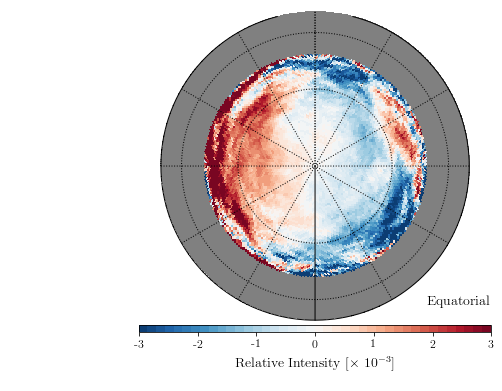

In [35]:
title = 'Relative Intensity [$\\times \ 10^{}$]'.format('{'+str(-scale)+'}')
fig, ax = anisotropy.plot_skymap(rel_int, smooth=smooth_rad, decmax=decmax, scale=scale,
                                 color_palette='RdBu_r', symmetric=True, llabel='IC86 2012-2013', 
                                 cbar_title=title, cbar_min=-3, cbar_max=3, polar=True)
outfile = 'IC86-{}_relint_{}_nside-{}_smooth-{:0.1f}.png'.format(years_str, composition, n_side, smooth_rad)
plt.savefig(os.path.join(figures_dir, outfile))

In [36]:
sig = anisotropy.get_map('sig', composition=composition, config=config, smooth=smooth_rad, decmax=decmax)

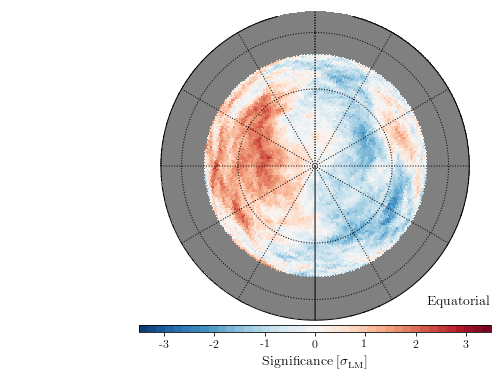

In [37]:
title = 'Significance [$\mathrm{\sigma_{LM}}$]'
fig, ax = anisotropy.plot_skymap(sig, smooth=smooth_rad, decmax=decmax, scale=scale,
                                 color_palette='RdBu_r', symmetric=True, llabel='IC86 2012-2013', 
                                 cbar_title=title, cbar_min=-3.5, cbar_max=3.5, polar=True)
outfile = 'IC86-{}_sig_{}_nside-{}_smooth-{:0.1f}.png'.format(years_str, composition, n_side, smooth_rad)
plt.savefig(os.path.join(figures_dir, outfile))

In [8]:
rel_int_diff = anisotropy.get_relint_diff(config=config, n_side=n_side, smooth=smooth_rad, decmax=decmax, scale=scale)

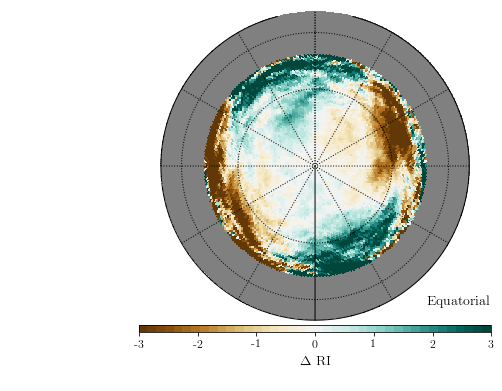

In [22]:
# title = '$\mathrm{\Delta \ RI \\times$}' + ' $10^{}$]'.format('{'+str(-scale)+'}')
title = '$\mathrm{\Delta \ RI}$'
fig, ax = anisotropy.plot_skymap(rel_int_diff, smooth=smooth_rad, decmax=decmax, scale=scale,
                                 color_palette='BrBG', symmetric=True, llabel='IC86 2012-2013', 
                                 cbar_title=title, cbar_min=-3, cbar_max=3, polar=True)
outfile = 'IC86-{}_RI-diff_nside-{}_smooth-{:0.1f}.png'.format(years_str, n_side, smooth_rad)
plt.savefig(os.path.join(figures_dir, outfile))